In [1]:
# Set plotting interface
%matplotlib inline

# Load a couple of things needed from astroplan
from astroplan import Observer, FixedTarget
from astroplan.plots import plot_airmass

# And load Time from astropy
from astropy.time import Time

In [2]:
feder = Observer(latitude="46.86678d", longitude="263.54672d")
my_object = FixedTarget.from_name('ey uma')
obs_time = Time("2016-09-16 04:00:00", scale='utc')

In [3]:
plot_airmass(my_object, feder, obs_time, brightness_shading=True, altitude_yaxis=True) # , brightness_shading=True, altitude_yaxis=True

TypeError: plot_airmass() got an unexpected keyword argument 'brightness_shading'

In [4]:
from astropy import units as u
import numpy as np
times = obs_time + np.arange(0, 360, 15) * u.day
times

<Time object: scale='utc' format='iso' value=['2016-09-16 04:00:00.000' '2016-10-01 04:00:00.000'
 '2016-10-16 04:00:00.000' '2016-10-31 04:00:00.000'
 '2016-11-15 04:00:00.000' '2016-11-30 04:00:00.000'
 '2016-12-15 04:00:00.000' '2016-12-30 04:00:00.000'
 '2017-01-14 04:00:00.000' '2017-01-29 04:00:00.000'
 '2017-02-13 04:00:00.000' '2017-02-28 04:00:00.000'
 '2017-03-15 04:00:00.000' '2017-03-30 04:00:00.000'
 '2017-04-14 04:00:00.000' '2017-04-29 04:00:00.000'
 '2017-05-14 04:00:00.000' '2017-05-29 04:00:00.000'
 '2017-06-13 04:00:00.000' '2017-06-28 04:00:00.000'
 '2017-07-13 04:00:00.000' '2017-07-28 04:00:00.000'
 '2017-08-12 04:00:00.000' '2017-08-27 04:00:00.000']>

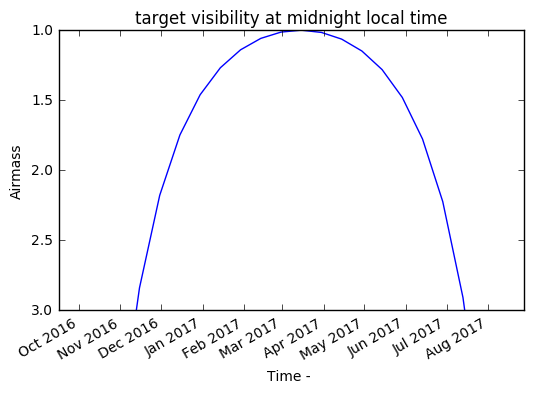

In [6]:
import matplotlib.pyplot as plt
ax = plot_airmass(my_object, feder, times)
ax.xaxis_date()
plt.title('target visibility at midnight local time'.format(my_object.name))